# Problema 7.2

<style type="text/css">
    ol { list-style-type: lower-alpha; }
</style>

Para controlar un sistema de primer orden se utiliza un controlador PD con un elemento de medida cuya dinámica también es de primer orden.

1. Determinar las expresiones de la constante de tiempo y el coeficiente de amortiguamiento para el sis- tema de lazo cerrado

2. Si τp = 1 min y τm = 10s, calcular Kc para que el coeficiente de amortiguamiento sea 0.7 en los siguientes supuestos: (1) τd = 0 y (2) τd = 3 s.

3. Comparar, para las dos situaciones del apartado b) el offset y el periodo, y comentar la ventaja que representa la adición de la acción derivativa

---

**Solución**

a) El lazo de control propuesto es:

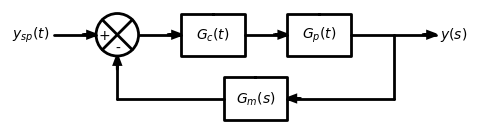

In [8]:
using PyCall, LaTeXStrings

schemdraw = pyimport("schemdraw")
dsp = pyimport("schemdraw.dsp")

d = schemdraw.Drawing(unit=1, fontsize=10)

d.add(dsp.Arrow().right().label(L"y_{sp}(t)", "left"))
suma = d.add(dsp.Mixer(W="+", S="-").anchor("W"))
d.add(dsp.Arrow().right().at(suma.E))
control = d.add(dsp.Box(w=1.5, h=1).label(L"G_c(t)").anchor("W"))
d.add(dsp.Arrow().right().at(control.E))
proceso = d.add(dsp.Box(w=1.5, h=1).label(L"G_p(t)").anchor("W"))
d.add(dsp.Line().right().at(proceso.E))
dot = d.add(dsp.Dot(radius=0))
d.push()
d.add(dsp.Arrow().right().label(L"y(s)", "right").at(dot.center))
d.pop()
d.add(dsp.Line().down().length(1.5).at(dot.center))
d.add(dsp.Arrow().left().length(2.5))
medidor = d.add(dsp.Box(w=1.5, h=1).label(L"G_m(s)").anchor("E"))
d.add(dsp.Line().left().at(medidor.W).tox(suma.S))
d.add(dsp.Arrow().to(suma.S))

d.draw(show=false)

donde:

$$\begin{aligned}
  G_c &= K_c  (1 + \tau_D s)\\
  G_p &= \frac{K_p}{\tau_p s + 1}\\
  G_m &= \frac{K_m}{\tau_m s + 1}
\end{aligned}$$
  
La función de transferencia que relaciona la respuesta dinámica del bucle de control con un cambio en la consigna es:

$$\frac{y}{y_{sp}} = \frac{G_c G_p}{1 + G_c G_p} =
   \frac{\frac{K_c  K_p \tau_D \tau_m}{K_c K_m  K_p + 1} s^2 + \frac{(\tau_m + \tau_D) K_c K_p \tau_D}{K_c K_m K_p + 1} s +
   \frac{K_c K_p}{K_c K_m K_p    + 1}}{\frac{\tau_p \tau_m}{K_c K_m K_p + 1} s^2 + \frac{\tau_p + \tau_m + Kc Km Kp \tau_D}{K_c K_m K_p + 1} s + 1}$$

Al tratarse de una función de transferencia de segundo orden:

$$\begin{aligned}
  \tau^2 &= \frac{\tau_p \tau_m}{K_c K_m K_p + 1}\\
  2 \tau \zeta &= \frac{\tau_p + \tau_m + Kc Km Kp \tau_D }{K_c K_m K_p + 1}
\end{aligned}$$

Despejando se encuentra:

$$\begin{aligned}
  \tau &= \sqrt{\frac{\tau_p \tau_m}{K_c K_m K_p + 1}}\\
  \zeta &= \frac{1}{2} \sqrt{\frac{K_c K_m K_p + 1}{\tau_p \tau_m}}  \frac{\tau_p + \tau_m + K_c K_m K_p \tau_D }{K_c K_m K_p + 1}
\end{aligned}$$

b) Si $\tau_p = 1 \min = 60 s$ y $\tau_m = 10 s$, qué valores debe tomar $K_c$ para que $\zeta = 0.7$?

_Caso $\tau_D = 0$:_

Sustituyendo en la expresión del coeficiente de amortiguamiento:

$$0.7 = \frac{1}{2} \sqrt{\frac{1 + K_c K_p K_m}{600}}  \frac{70}{1 + K_c K_p
   K_m}$$
   
Por tanto: $$K_c = \frac{3.167}{K_p K_m}$$

_Caso $\tau_D = 3 s$:_

En este caso al sustituir en la ecuación del coeficiente de amortiguamiento se obtiene:

$$0.7 = \frac{1}{2} \sqrt{\frac{1 + K_c K_p K_m}{600}}  \frac{70 + 3 K_c K_p
   K_m}{1 + K_c K_p K_m}$$
   
Tomando $K = K_c K_p K_m$ y operando se obtiene:

$$34.29 = \sqrt{1 + K}  \frac{70 + 3 K}{1 + K}$$

Para resolver la ecuación hay que elevarla al cuadrado:

$$34.29^2 = (1 + K)  \frac{(70 + 3 K)^2}{(1 + K)^2}$$

Operando se ecuentra:

$$9 K^2 - 756 K + 3724 = 0$$

Las soluciones de esta ecuación son:

$$K = \left\{\begin{array}{l}
     78.745\\
     5.255
   \end{array}\right.$$
   
Es decir:

$$K = \left\{\begin{array}{l}
     \frac{78.745}{K_p K_m}\\
     \frac{5.255}{K_p K_m}
   \end{array}\right.$$ 
   
Se comprueba que la acción de control derivativa permite ganancias del controlador más elevadas para un mismo coeficiente de amortiguamiento. Eso supone que se pueden utilizar acciones de control proporcional más intensas sin aumentar las oscilaciones del conjunto controlador-proceso.

c\) Suponiendo un cambio en la consigna $y_{sp} (t)$ de tipo escalón unidad:

$$\mathrm{Offset} = \lim_{s \to 0} \left( s y_{sp} (s)
   - s \frac{y (s)}{y_{sp} (s)} y_{sp} (s) \right) = 1 -
   \underset{s \rightarrow 0}{\lim} s \frac{y}{y_{sp}}  \frac{1}{s} = 1
   - \frac{K_c K_p}{K_c K_m K_p + 1}$$
   
El *offset* es independiente de la acción derivativa tomada.

El periodo, para un sistema de segundo orden, es:

$$T = \frac{2 \pi \tau}{\sqrt[]{1 - \zeta^2}}$$

Sustituyendo:

$$T = \frac{2 \pi \sqrt[]{\frac{600}{1 + K}}}{\sqrt[]{1 - \frac{1}{4} 
   \frac{1 + K}{600} \left( \frac{70 + K \tau_D}{1 + K} \right)^2}}$$ 

Al aumentar la constante de tiempo derivativa, aumenta el periodo. Lo que significa que la respuesta es menos oscilatoria.